Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2007,CIUTAT VELLA,0.0,0,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
9,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-LOW,0,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,1
12,2007,CIUTAT VELLA,0.0,1,I HAVE ALWAYS LIVED IN THE CITY,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-LOW,1,IT HAS IMPROVED,IT WILL IMPROVE,SATISFIED,GOOD,0,0,0,0
14,2007,CIUTAT VELLA,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,LOW,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
17,2007,CIUTAT VELLA,1.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,ONE OF THE WORST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,GOOD,0,0,0,0


In [5]:
data.shape

(6914, 34)

In [6]:
# Dataset is imbalanced
data.groupby(['Would_not_stay_in_the_neighborhood']).size()

Would_not_stay_in_the_neighborhood
0.0    6137
1.0     777
dtype: int64

In [7]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [8]:
x_var = data.columns.tolist()

In [9]:
for i in ['ANY', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [10]:
x = data[x_var]

In [11]:
y = data['Would_not_stay_in_the_neighborhood']

In [12]:
x = pd.get_dummies(x, drop_first = True)

In [13]:
x = sm.add_constant(x)

In [14]:
resampling = TomekLinks()
columns = x.columns
x_resampled, y_resampled = resampling.fit_sample(x, y)
x_resampled = pd.DataFrame(data=x_resampled, columns=columns )
y_resampled= pd.DataFrame(data=y_resampled, columns=['Would_not_stay_in_the_neighborhood'])

print("length of oversampled data is ",len(x_resampled))
print("Number of people who would not stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==1]))
print("Number of people who would stay in the neighborhood in resampled data",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is ",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==1])/len(x_resampled))
print("Proportion of subscription data in resampled data is ",
      len(y_resampled[y_resampled['Would_not_stay_in_the_neighborhood']==0])/len(x_resampled))

length of oversampled data is  6791
Number of people who would not stay in the neighborhood in resampled data 777
Number of people who would stay in the neighborhood in resampled data 6014
Proportion of 'Would_not_stay_in_the_neighborhood' in resampled data is  0.11441613900750994
Proportion of subscription data in resampled data is  0.8855838609924901


In [15]:
x_resampled

,const,Gender,Owns_a_car,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,NOM_DISTRICTE_EIXAMPLE,NOM_DISTRICTE_GRÀCIA,...,House_size_51-100 M2,House_size_< 50 M2,House_size_> 150 M2,Monthly_family_income_2001-3000 EUROS,Monthly_family_income_< 1000 EUROS,Monthly_family_income_> 3000 EUROS,Social_class_LOW,Social_class_MIDDLE-HIGH,Social_class_MIDDLE-LOW,Social_class_MIDDLE-MIDDLE
0,1.0,0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1.0,1,0.0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.0,1,0.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.0,1,1.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1.0,1,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6786,1.0,1,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
6787,1.0,1,0.0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
6788,1.0,1,0.0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
6789,1.0,1,1.0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1


In [16]:
y_resampled['Would_not_stay_in_the_neighborhood'].unique()

array([0., 1.])

In [17]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.287693
         Iterations: 35


C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                           Results: Logit
Model:                    Logit                                   Pseudo R-squared:      0.191      
Dependent Variable:       Would_not_stay_in_the_neighborhood      AIC:                   4005.4451  
Date:                     2021-04-23 07:55                        BIC:                   4339.7894  
No. Observations:         6791                                    Log-Likelihood:        -1953.7    
Df Model:                 48                                      LL-Null:               -2415.2    
Df Residuals:             6742                                    LLR p-value:           2.8869e-162
Converged:                0.0000                                  Scale:                 1.0000     
No. Iterations:           35.0000                                                                   
----------------------------------------------------------------------------------------------------
                                 

In [18]:
result.pvalues.sort_values(ascending=False)

Social_class_MIDDLE-MIDDLE                      9.941206e-01
Social_class_MIDDLE-HIGH                        9.941049e-01
Social_class_MIDDLE-LOW                         9.940968e-01
Social_class_LOW                                9.940650e-01
const                                           9.937408e-01
Barri_transport_NORMAL                          9.832789e-01
Monthly_family_income_< 1000 EUROS              9.459924e-01
STREETS CLEANING_GOOD                           9.394227e-01
CIRCULATION_GOOD                                8.955093e-01
Barri_evolution_IT IS WORSE                     7.969885e-01
FACADES AND BUILDING CONSERVATION_GOOD          7.295544e-01
BCN_over_barri_future                           7.184531e-01
Barri_evolution_IT IS THE SAME                  6.941042e-01
Barri_transport_GOOD                            6.077070e-01
MUNICIPAL MARKETS_GOOD                          5.307016e-01
BUS_GOOD                                        4.530025e-01
Gender                  

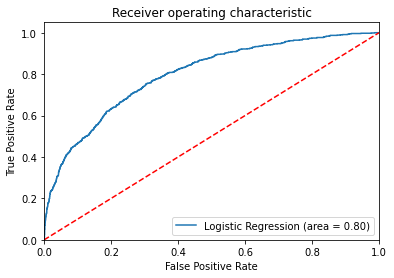

In [19]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [20]:
# NIE POPRAWIŁAM PONIŻSZEGO FEATURE SELECTION

In [20]:
for i in ['MUNICIPAL POLICE_GOOD', 'CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD', 'BCN_over_barri_future', 
          'Gender', 'Barri_transport_GOOD']:
    del x_resampled[i]

In [21]:
logit_model = sm.Logit(y_resampled,x_resampled)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.304811
         Iterations 7
                                      Results: Logit
Model:                Logit                                Pseudo R-squared:   0.194      
Dependent Variable:   Would_not_stay_in_the_neighborhood   AIC:                2786.1900  
Date:                 2021-04-16 08:22                     BIC:                3067.5811  
No. Observations:     4426                                 Log-Likelihood:     -1349.1    
Df Model:             43                                   LL-Null:            -1672.9    
Df Residuals:         4382                                 LLR p-value:        6.4015e-109
Converged:            1.0000                               Scale:              1.0000     
No. Iterations:       7.0000                                                              
------------------------------------------------------------------------------------------
                          

In [22]:
result.pvalues.sort_values(ascending=False)

GARBAGE COLLECTION_GOOD                      9.922321e-01
NOM_DISTRICTE_GRÀCIA                         8.938374e-01
BCN_over_barri_evolution                     7.856778e-01
FACADES AND BUILDING CONSERVATION_GOOD       6.759406e-01
Owns_a_car                                   5.617183e-01
Barri_evolution_IT IS THE SAME               5.528285e-01
NOM_DISTRICTE_SANTS - MONTJUÏC               5.459152e-01
CIRCULATION_GOOD                             5.388068e-01
NOM_DISTRICTE_SANT ANDREU                    4.883139e-01
Monthly_family_income_< 1000 EUROS           4.722098e-01
NOM_DISTRICTE_NOU BARRIS                     3.905991e-01
Social_class_MIDDLE-MIDDLE                   3.207760e-01
Social_class_MIDDLE-LOW                      2.648302e-01
Social_class_LOW                             2.621467e-01
PUBLIC LIGHTING_GOOD                         2.504642e-01
STREETS CLEANING_GOOD                        2.335794e-01
House_size_51-100 M2                         2.213443e-01
Barri_evolutio

In [23]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                               dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Owns_a_car                                    0.0062      0.011      0.580      0.562      -0.015       0.027
Living_alone                                  0.0189      0.011      1.672      0.095      -0.003       0.041
BCN_over_barri_evolution                     -0.0040      0.015     -0.272      0.786      -0.033       0.025
BCN_over_barri_satisfaction_of_living         0.0468      0.022      2.154      0.031       0.004       0.089
BCN_over_barri_transport                      0.0246      0.014      1.711      0.087      -0.004       0.053
NOM_DISTRICTE_

In [24]:
result.pred_table()

array([[3805.,   65.],
       [ 453.,  103.]])

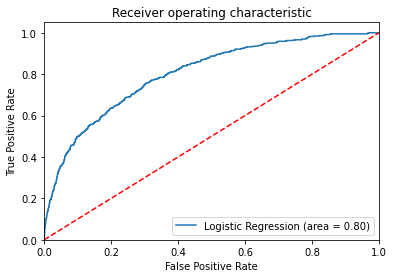

In [26]:
logit_roc_auc = roc_auc_score(y_resampled, result.predict(x_resampled))
fpr, tpr, thresholds = roc_curve(y_resampled, result.predict(x_resampled))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()